In [ ]:
import radiomics
from radiomics import featureextractor
import six, numpy as np
import SimpleITK as sitk
import pandas as pd
import os
import shutil
import glob
import cv2
from tensorflow.keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import os
import yaml
import seaborn as sns

2024-12-16 14:34:14.105093: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-16 14:34:14.105758: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 14:34:14.108233: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 14:34:14.115496: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-16 14:34:14.127247: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

MELANOMA 

In [12]:
import glob
import cv2
imgPath = []
for img in glob.glob('mel/*.jpg'):
    n = sitk.ReadImage(img)
    imgPath.append(img)
print(imgPath)

# labelPath = []
# for img in glob.glob('../dataset/HAM10000_segmentations_lesion_tschandl/*.png'):
#     n = sitk.ReadImage(img)
#     labelPath.append(img)
# print(labelPath)

['mel/ISIC_0027125.jpg', 'mel/ISIC_0025081.jpg', 'mel/ISIC_0027402.jpg', 'mel/ISIC_0027260.jpg', 'mel/ISIC_0032918.jpg', 'mel/ISIC_0032985.jpg', 'mel/ISIC_0029652.jpg', 'mel/ISIC_0027407.jpg', 'mel/ISIC_0032220.jpg', 'mel/ISIC_0029000.jpg', 'mel/ISIC_0027442.jpg', 'mel/ISIC_0028655.jpg', 'mel/ISIC_0029558.jpg', 'mel/ISIC_0033174.jpg', 'mel/ISIC_0032960.jpg', 'mel/ISIC_0031369.jpg', 'mel/ISIC_0033820.jpg', 'mel/ISIC_0034051.jpg', 'mel/ISIC_0029473.jpg', 'mel/ISIC_0033232.jpg', 'mel/ISIC_0030824.jpg', 'mel/ISIC_0033872.jpg', 'mel/ISIC_0031745.jpg', 'mel/ISIC_0030970.jpg', 'mel/ISIC_0033141.jpg', 'mel/ISIC_0029157.jpg', 'mel/ISIC_0032847.jpg', 'mel/ISIC_0032984.jpg', 'mel/ISIC_0032622.jpg', 'mel/ISIC_0027302.jpg', 'mel/ISIC_0033278.jpg', 'mel/ISIC_0029238.jpg', 'mel/ISIC_0032645.jpg', 'mel/ISIC_0028900.jpg', 'mel/ISIC_0031709.jpg', 'mel/ISIC_0026811.jpg', 'mel/ISIC_0027174.jpg', 'mel/ISIC_0027561.jpg', 'mel/ISIC_0028075.jpg', 'mel/ISIC_0029744.jpg', 'mel/ISIC_0034218.jpg', 'mel/ISIC_00315

In [13]:
x = 'mel/ISIC_0024310.jpg'
x.split('_')[1].split('.')[0]






'0024310'

In [14]:

# radiomics.setVerbosity(logging.INFO)

params_path = os.path.join(os.getcwd(), 'Params.yaml')
with open(params_path, 'r') as file:
    params = yaml.safe_load(file)

im_n = imgPath
# print(im_n)
imagepath = 'mel/ISIC_' #0024310.jpg'
labelpath = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_' #0024310_segmentation.png'

features ={}

for i in range(len(im_n)):
    img = sitk.ReadImage(im_n[i])
    ll = im_n[i].split('_')[1].split('.')[0]
    # print(str(labelPath), type(ll))
    labelPath = labelpath+str(ll)+'_segmentation.png'
    label = sitk.ReadImage(labelPath)
    mask = image.load_img(labelPath, color_mode='grayscale')
    mask = image.img_to_array(mask) / 255.0
    mask_contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    im = image.load_img(im_n[i], target_size=(224, 224))
    im = image.img_to_array(im)
    t = cv2.imread(im_n[i])
    img_with_contours = t.copy()
    # # Draw the border of the segmentation mask with a blue line
    cv2.drawContours(img_with_contours, mask_contours, -1, (0, 0, 255), 2)
    # plt.imshow(img_with_contours)
    plt.imsave(im_n[i].split('.')[0]+'_mask.jpg', img_with_contours)
    plt.imsave(im_n[i].split('.')[0]+'_or.jpg', t)

    

In [1]:
for i in range(len(im_n)):
    # print(im_n[i])
    maskpath_1 = im_n[i].split('.')[0]+'_mask.jpg'
    # print(maskpath_1)
    impath_1 =im_n[i].split('.')[0]+'_or.jpg'
    mask_1 = sitk.ReadImage(maskpath_1)
    im_1 = sitk.ReadImage(impath_1)
    single_channel_image = sitk.VectorIndexSelectionCast(im_1, 0) #sitk.ExtractComponentImageFilter()
    
    extractor = featureextractor.RadiomicsFeatureExtractor(params)
    extractor.disableAllFeatures()
    extractor.enableFeatureClassByName('firstorder')
    
    # result = extractor.execute(single_channel_image, mask_1)
    features[i] = extractor.execute ( single_channel_image, mask_1)
    
# A list of the valid features, sorted
feature_names = list(sorted(filter ( lambda k: k.startswith('original_'), features[1] )))



NameError: name 'im_n' is not defined

In [16]:
len(feature_names)

18

In [17]:
len(im_n)

1113

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.38600000e+02 1.53800000e+02 1.01041300e+06 ... 6.51878051e+04
  1.02761431e-01 3.90158443e+01]
 [1.31000000e+02 1.61800000e+02 1.37812700e+06 ... 8.89112415e+04
  6.67674477e-02 1.35167549e+02]
 ...
 [1.66000000e+02 1.92100000e+02 2.61382400e+06 ... 1.68633469e+05
  6.43750000e-02 1.19619375e+02]
 [1.36400000e+02 1.62200000e+02 9.99029000e+05 ... 6.44533550e+04
  7.65432099e-02 9.22587654e+01]
 [1.55000000e+02 1.72400000e+02 1.25039500e+06 ... 8.06704838e+04
  8.37483024e-02 6.28863739e+01]]


<Axes: >

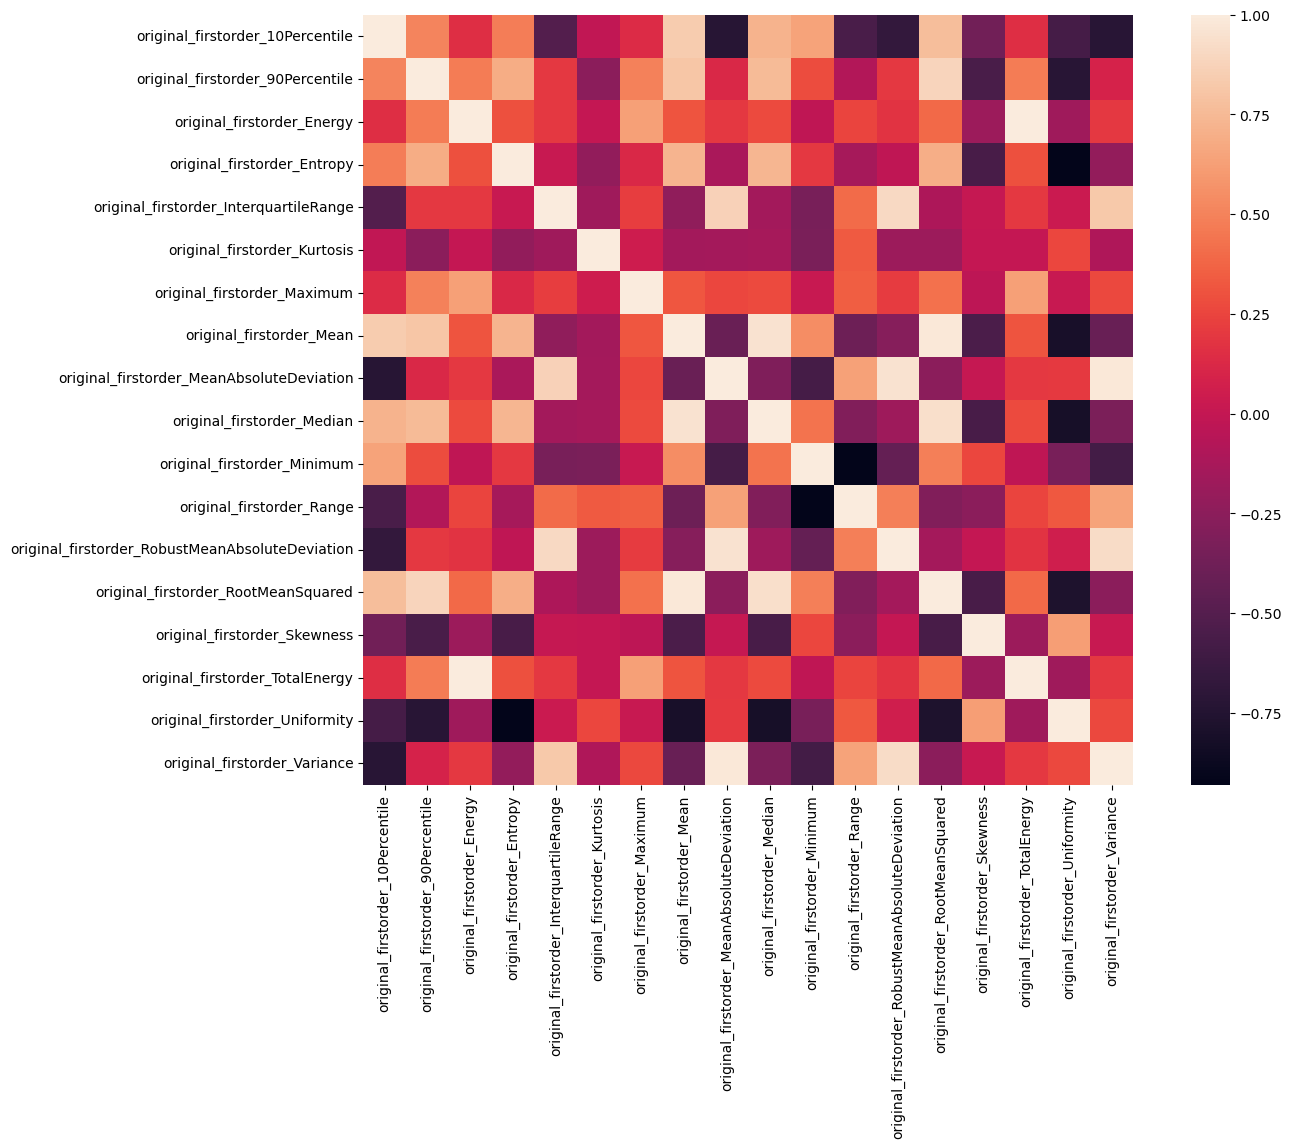

In [18]:
samples = np.zeros((len(im_n),len(feature_names)))
print(samples)
for i in range(1,len(im_n)):
    a = np.array([])
    for feature_name in feature_names:
        a = np.append(a, features[i][feature_name])
    samples[i,:] = a
print(samples)  
# Construct a pandas dataframe from the samples
d = pd.DataFrame(data=samples, columns=feature_names)

corr = d.corr()

# Set up the matplotlib figure, make it big!
f, ax = plt.subplots(figsize=(15, 10))


# Draw the heatmap using seaborn
sns.heatmap(corr, vmax=1, square = True)

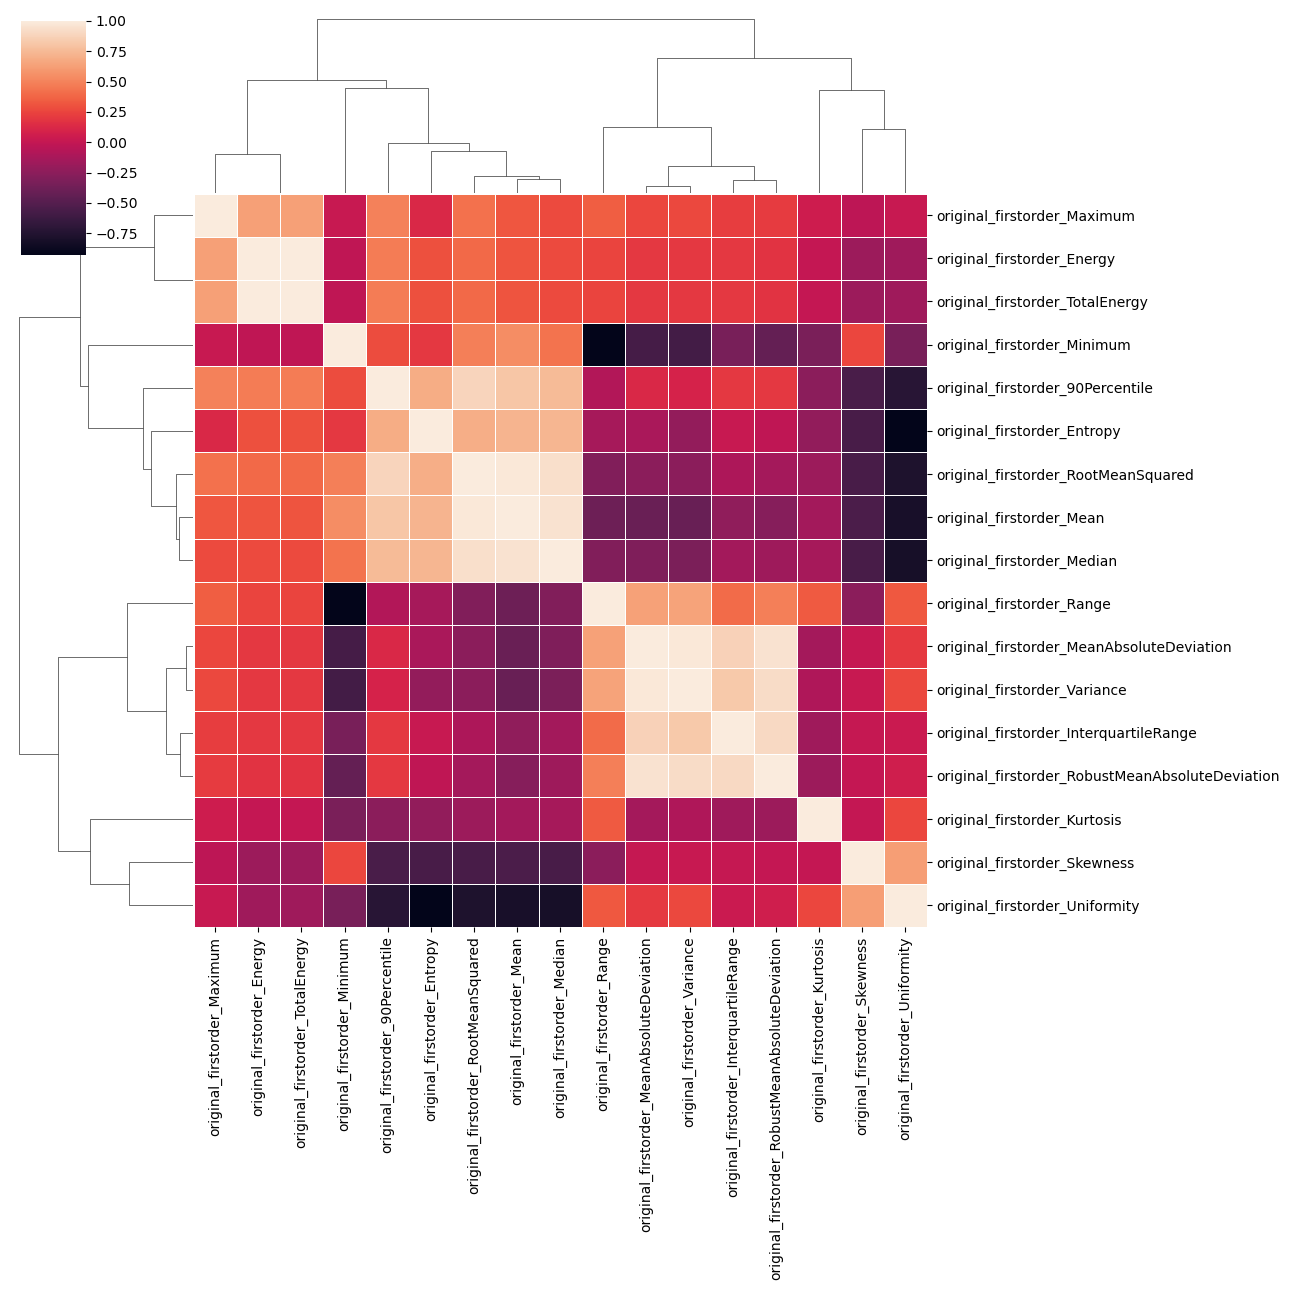

In [20]:
# Choose a subset of features for clustering
dd_mel = d.iloc[:,1:50]

pp = sns.clustermap(dd_mel.corr(), linewidths=.5, figsize=(13,13))
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)

plt.savefig('mel_corr_1st_order.png', dpi= 400)
plt.show()
plt.close()

In [9]:
print(feature_names)

['original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_Mean', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness', 'original_firstorder_TotalEnergy', 'original_firstorder_Uniformity', 'original_firstorder_Variance']


In [10]:
d

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance
0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,138.6,153.8,1010413.0,3.528306,7.00,2.951214,161.0,146.489362,4.903576,146.0,133.0,28.0,3.186267,146.622471,0.238466,65187.805108,0.102761,39.015844
2,131.0,161.8,1378127.0,4.114451,16.00,2.606065,174.0,147.444444,9.368607,146.0,122.0,52.0,6.518400,147.902102,-0.030096,88911.241532,0.066767,135.167549
3,1.0,148.0,990921.0,4.544906,27.25,5.066569,164.0,112.455882,29.519464,123.0,1.0,163.0,29.816857,120.716062,-1.762716,63930.259236,0.052336,1926.042171
4,136.0,170.2,2366227.0,4.482766,18.00,2.638645,178.0,154.050505,10.636874,154.0,121.0,57.0,7.849063,154.600397,-0.401149,152659.501132,0.050913,169.724722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,155.9,176.0,2193534.0,3.791840,9.00,2.877834,181.0,165.425000,5.800000,165.5,147.0,34.0,4.018935,165.587364,-0.179315,141518.039544,0.083125,53.744375
1109,144.0,175.0,3452612.0,4.220236,15.75,24.498761,189.0,155.550725,13.625079,159.0,1.0,188.0,6.260080,158.173726,-4.455395,222748.715792,0.070048,822.899601
1110,166.0,192.1,2613824.0,4.150919,16.00,3.612760,203.0,180.425000,9.043125,182.0,141.0,62.0,6.923077,180.756189,-0.656903,168633.469184,0.064375,119.619375
1111,136.4,162.2,999029.0,3.886546,15.00,1.981129,168.0,148.688889,8.167901,150.0,132.0,36.0,6.155102,148.998807,0.124989,64453.354964,0.076543,92.258765


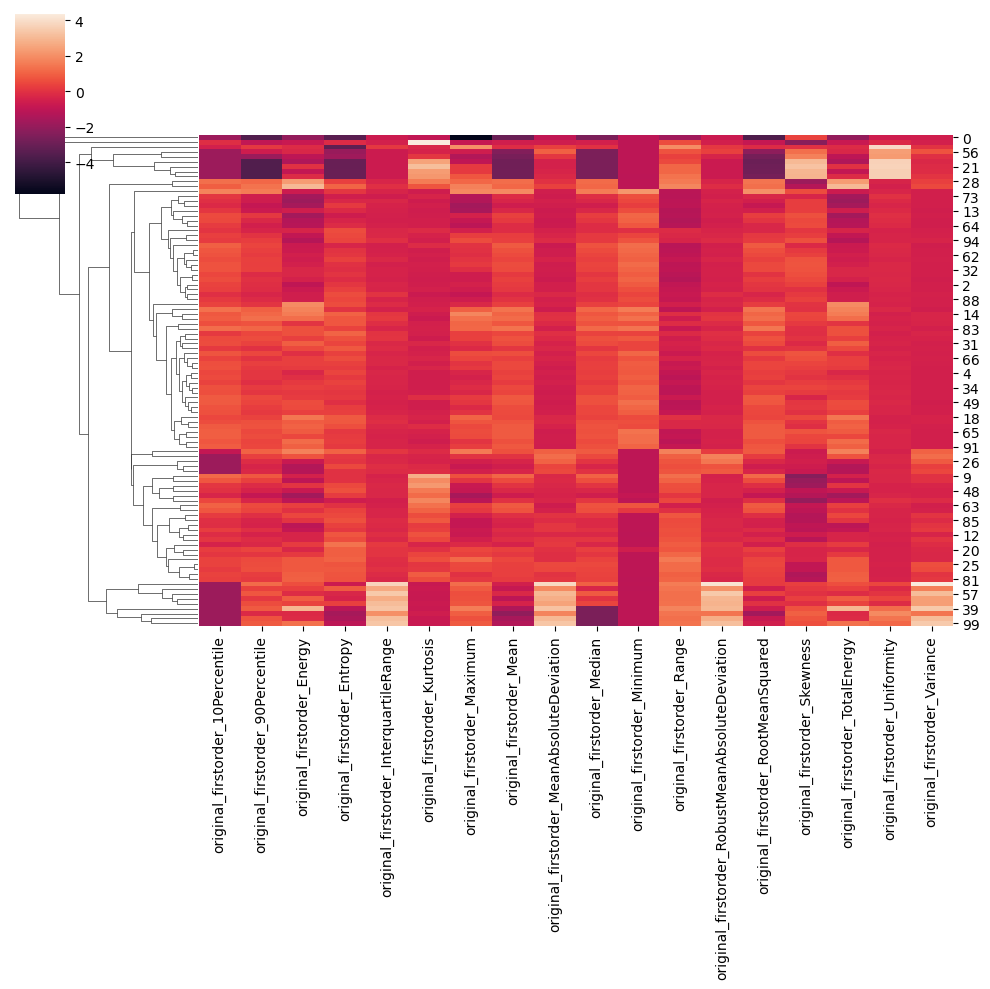

In [11]:
pp = sns.clustermap(d.head(100), col_cluster=False, metric='chebyshev', z_score=1)
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(dd_mel)
# Create a PCA instance
pca = PCA(n_components=2)  # Specify the number of components
# Fit PCA to the standardized data
pca.fit(data_std)
# Transform the data into the reduced dimensionality
data_pca = pca.transform(data_std)
# The principal components
components = pca.components_
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# Print the results
print("Original Data:")
print(dd_mel)
print("Standardized Data:")
print(data_std)
print("\nPrincipal Components:")
print(components)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)
print("\nData in Reduced Dimensionality:")
print(data_pca)


Original Data:
      original_firstorder_90Percentile  original_firstorder_Energy  \
0                                  0.0                         0.0   
1                                153.8                   1010413.0   
2                                161.8                   1378127.0   
3                                148.0                    990921.0   
4                                170.2                   2366227.0   
...                                ...                         ...   
1108                             176.0                   2193534.0   
1109                             175.0                   3452612.0   
1110                             192.1                   2613824.0   
1111                             162.2                    999029.0   
1112                             172.4                   1250395.0   

      original_firstorder_Entropy  original_firstorder_InterquartileRange  \
0                        0.000000                                  

In [41]:
dd_mel.iloc[:,0]

0         0.0
1       153.8
2       161.8
3       148.0
4       170.2
        ...  
1108    176.0
1109    175.0
1110    192.1
1111    162.2
1112    172.4
Name: original_firstorder_90Percentile, Length: 1113, dtype: float64

[ 5.96345193e+01  3.84431191e+06  9.86629477e-01  2.30184951e+01
 -1.24566226e-01  4.57628890e+01  4.07668716e+01  1.08724909e+01
  4.09546229e+01 -4.31487701e+00  5.00777660e+01  9.97362790e+00
  4.21855070e+01 -1.10780504e+00  2.48019627e+05 -1.04895652e-01
  1.08819835e+03]


ValueError: too many values to unpack (expected 2)

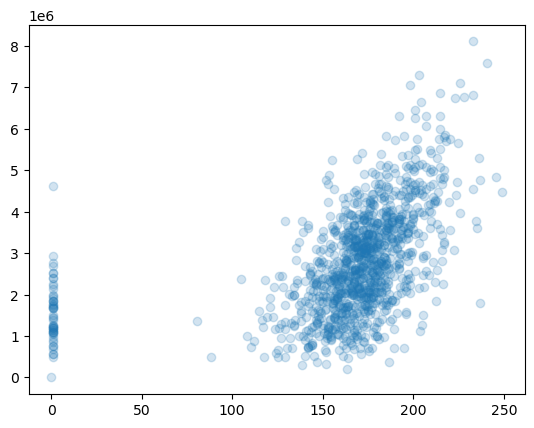

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(dd_mel)
# print(pca.components_)
# print(pca.explained_variance_)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


# plot data
plt.scatter(dd_mel.iloc[:, 0], dd_mel.iloc[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    print(v)
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

# pca = PCA(n_components=1)
# pca.fit(X)
# X_pca = pca.transform(X)
# print("original shape:   ", X.shape)
# print("transformed shape:", X_pca.shape)

# X_new = pca.inverse_transform(X_pca)
# plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
# plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
# plt.axis('equal');


benign keratosis-like lesions (BKL)

In [30]:
import glob
import cv2
imgPath = []
for img in glob.glob('bkl/*.jpg'):
    n = sitk.ReadImage(img)
    imgPath.append(img)
print(imgPath)

# labelPath = []
# for img in glob.glob('../dataset/HAM10000_segmentations_lesion_tschandl/*.png'):
#     n = sitk.ReadImage(img)
#     labelPath.append(img)
# print(labelPath)

['bkl/ISIC_0025804.jpg', 'bkl/ISIC_0031639.jpg', 'bkl/ISIC_0025654.jpg', 'bkl/ISIC_0025805.jpg', 'bkl/ISIC_0029311.jpg', 'bkl/ISIC_0032757.jpg', 'bkl/ISIC_0024814.jpg', 'bkl/ISIC_0026959.jpg', 'bkl/ISIC_0028681.jpg', 'bkl/ISIC_0024635.jpg', 'bkl/ISIC_0024871.jpg', 'bkl/ISIC_0024412.jpg', 'bkl/ISIC_0029518.jpg', 'bkl/ISIC_0030272.jpg', 'bkl/ISIC_0025819.jpg', 'bkl/ISIC_0029195.jpg', 'bkl/ISIC_0024832.jpg', 'bkl/ISIC_0025515.jpg', 'bkl/ISIC_0026634.jpg', 'bkl/ISIC_0028970.jpg', 'bkl/ISIC_0033913.jpg', 'bkl/ISIC_0027606.jpg', 'bkl/ISIC_0028121.jpg', 'bkl/ISIC_0030365.jpg', 'bkl/ISIC_0027509.jpg', 'bkl/ISIC_0027996.jpg', 'bkl/ISIC_0033677.jpg', 'bkl/ISIC_0031556.jpg', 'bkl/ISIC_0032040.jpg', 'bkl/ISIC_0027973.jpg', 'bkl/ISIC_0029233.jpg', 'bkl/ISIC_0030700.jpg', 'bkl/ISIC_0025376.jpg', 'bkl/ISIC_0026663.jpg', 'bkl/ISIC_0030605.jpg', 'bkl/ISIC_0031761.jpg', 'bkl/ISIC_0026265.jpg', 'bkl/ISIC_0030118.jpg', 'bkl/ISIC_0026967.jpg', 'bkl/ISIC_0029522.jpg', 'bkl/ISIC_0026311.jpg', 'bkl/ISIC_00268

In [31]:

# radiomics.setVerbosity(logging.INFO)

params_path = os.path.join(os.getcwd(), 'Params.yaml')
with open(params_path, 'r') as file:
    params = yaml.safe_load(file)

im_n = imgPath
# print(im_n)
imagepath = 'bkl/ISIC_' #0024310.jpg'
labelpath = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_' #0024310_segmentation.png'

features ={}

for i in range(len(im_n)):
    img = sitk.ReadImage(im_n[i])
    ll = im_n[i].split('_')[1].split('.')[0]
    # print(str(labelPath), type(ll))
    labelPath = labelpath+str(ll)+'_segmentation.png'
    label = sitk.ReadImage(labelPath)
    mask = image.load_img(labelPath, color_mode='grayscale')
    mask = image.img_to_array(mask) / 255.0
    mask_contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    im = image.load_img(im_n[i], target_size=(224, 224))
    im = image.img_to_array(im)
    t = cv2.imread(im_n[i])
    img_with_contours = t.copy()
    # # Draw the border of the segmentation mask with a blue line
    cv2.drawContours(img_with_contours, mask_contours, -1, (0, 0, 255), 2)
    # plt.imshow(img_with_contours)
    plt.imsave(im_n[i].split('.')[0]+'_mask.jpg', img_with_contours)
    plt.imsave(im_n[i].split('.')[0]+'_or.jpg', t)

    

In [32]:
im_n = imgPath

for i in range(len(im_n)):
    # print(im_n[i])
    maskpath_1 = im_n[i].split('.')[0]+'_mask.jpg'
    # print(maskpath_1)
    impath_1 =im_n[i].split('.')[0]+'_or.jpg'
    mask_1 = sitk.ReadImage(maskpath_1)
    im_1 = sitk.ReadImage(impath_1)
    single_channel_image = sitk.VectorIndexSelectionCast(im_1, 0) #sitk.ExtractComponentImageFilter()
    
    extractor = featureextractor.RadiomicsFeatureExtractor(params)
    extractor.disableAllFeatures()
    extractor.enableFeatureClassByName('firstorder')
    
    # result = extractor.execute(single_channel_image, mask_1)
    features[i] = extractor.execute ( single_channel_image, mask_1)
    
# A list of the valid features, sorted
feature_names = list(sorted(filter ( lambda k: k.startswith('original_'), features[1] )))



/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/radiomics/imageoperations.py:125: RuntimeWarning: overflow encountered in scalar add
  highBound = maximum + 2 * binWidth
/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/radiomics/imageoperations.py:127: RuntimeWarning: overflow encountered in scalar subtract
  binEdges = numpy.arange(lowBound, highBound, binWidth)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.53000000e+02 1.74000000e+02 3.39876100e+06 ... 2.19274465e+05
  7.69920000e-02 7.58551040e+01]
 [5.10000000e+01 1.38000000e+02 3.47850600e+06 ... 2.24419293e+05
  2.83109458e-02 1.05875990e+03]
 ...
 [1.58000000e+02 1.89200000e+02 4.12471300e+06 ... 2.66109984e+05
  5.80197712e-02 1.52032400e+02]
 [1.22000000e+02 1.54400000e+02 2.04823100e+06 ... 1.32143671e+05
  4.84758494e-02 1.62777186e+02]
 [1.29300000e+02 1.46000000e+02 8.44450000e+05 ... 5.44805362e+04
  9.29752066e-02 4.75495868e+01]]


<Axes: >

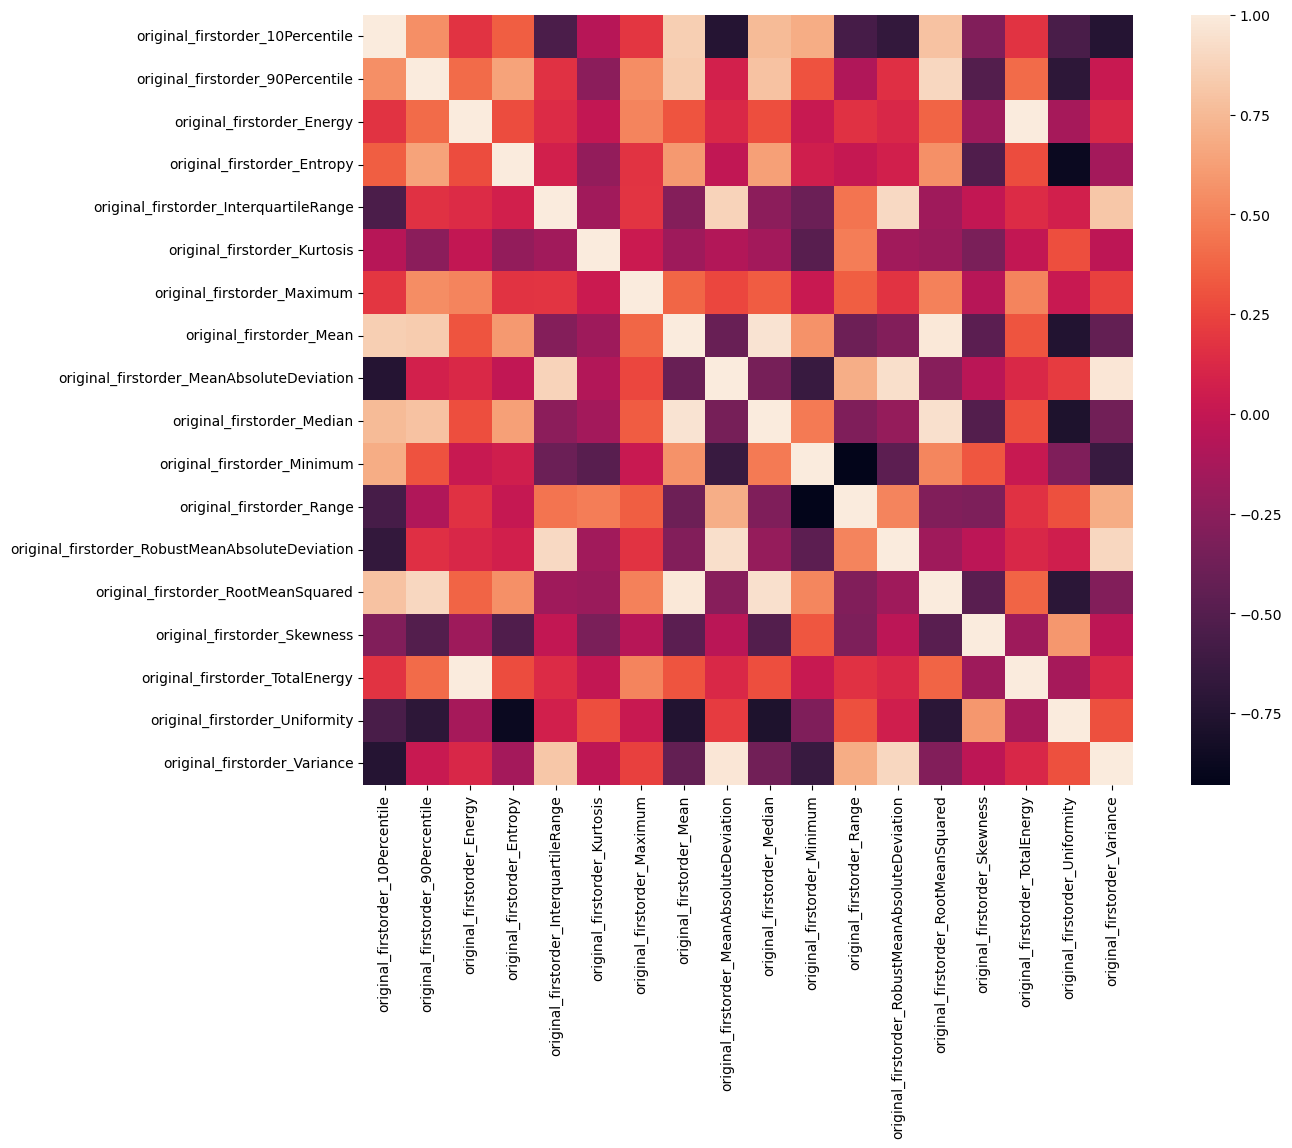

In [33]:
samples = np.zeros((len(im_n),len(feature_names)))
print(samples)
for i in range(1,len(im_n)):
    a = np.array([])
    for feature_name in feature_names:
        a = np.append(a, features[i][feature_name])
    samples[i,:] = a
print(samples)  
# Construct a pandas dataframe from the samples
d = pd.DataFrame(data=samples, columns=feature_names)

corr = d.corr()

# Set up the matplotlib figure, make it big!
f, ax = plt.subplots(figsize=(15, 10))


# Draw the heatmap using seaborn
sns.heatmap(corr, vmax=1, square = True)

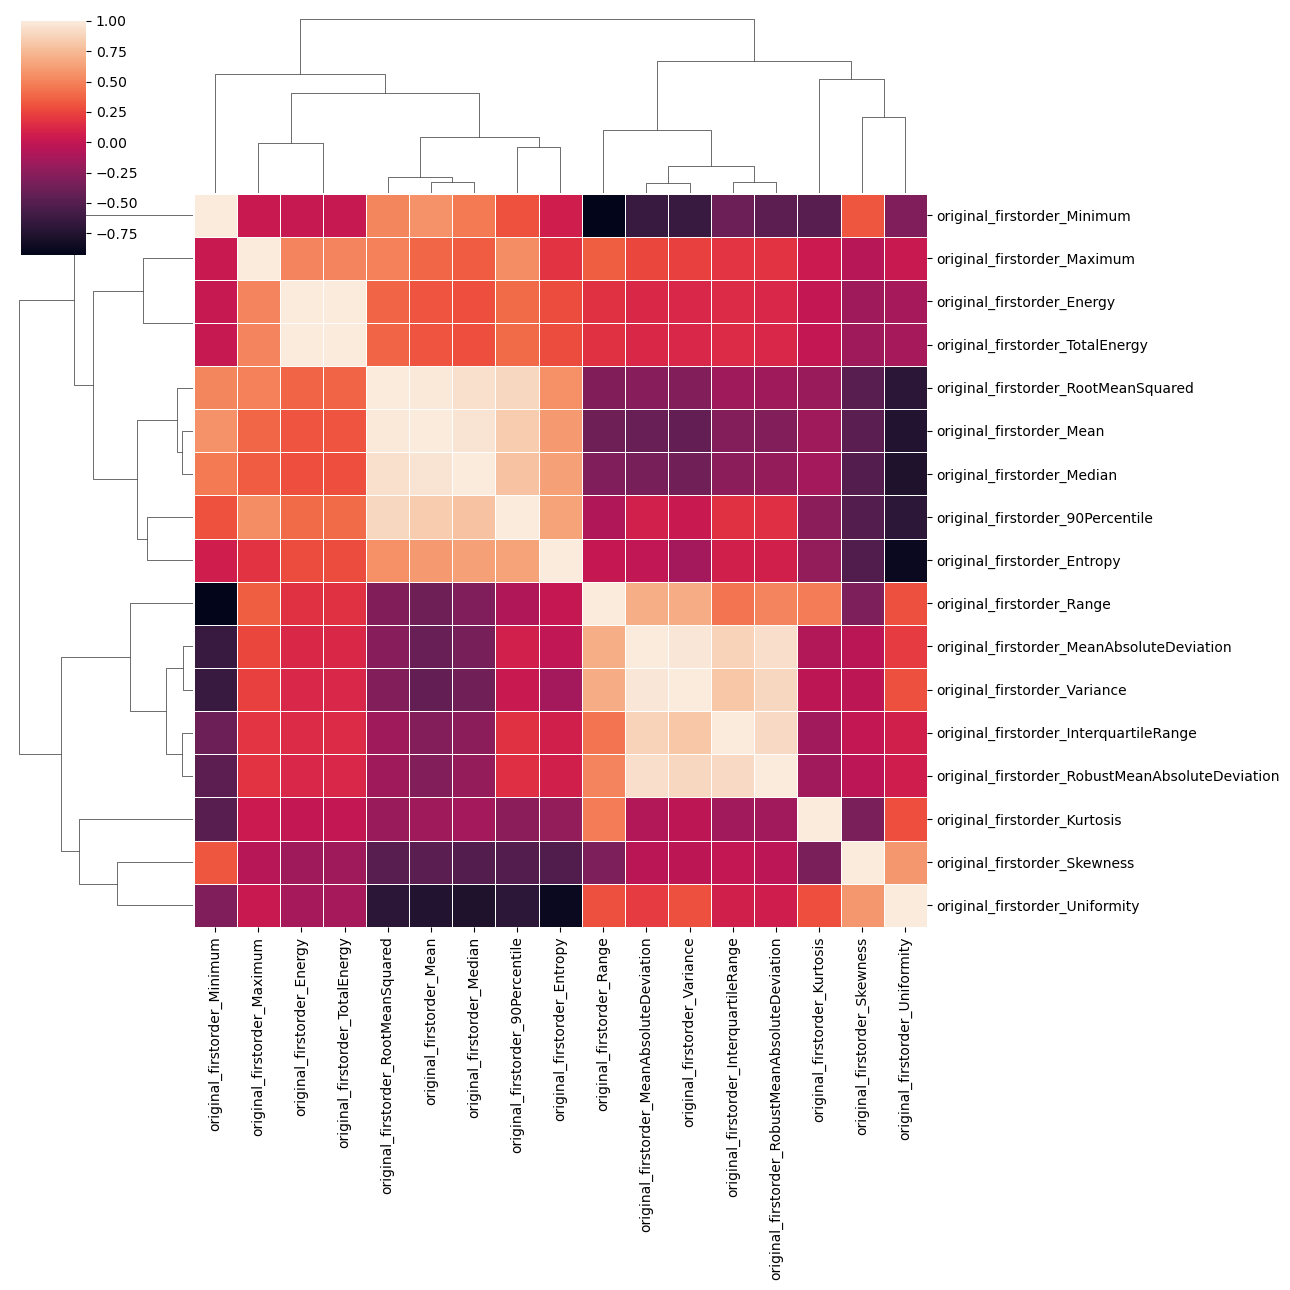

In [34]:
# Choose a subset of features for clustering
dd = d.iloc[:,1:50]

pp = sns.clustermap(dd.corr(), linewidths=.5, figsize=(13,13))
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)

plt.savefig('bkl_corr_1st_order.png', dpi= 400)
plt.show()
plt.close()

 basal cell carcinoma (bcc)

In [20]:
import glob
import cv2
imgPath = []
for img in glob.glob('bcc/*.jpg'):
    n = sitk.ReadImage(img)
    imgPath.append(img)
print(imgPath)

# labelPath = []
# for img in glob.glob('../dataset/HAM10000_segmentations_lesion_tschandl/*.png'):
#     n = sitk.ReadImage(img)
#     labelPath.append(img)
# print(labelPath)

['bcc/ISIC_0026957.jpg', 'bcc/ISIC_0026574.jpg', 'bcc/ISIC_0027090.jpg', 'bcc/ISIC_0031976.jpg', 'bcc/ISIC_0024331.jpg', 'bcc/ISIC_0027819.jpg', 'bcc/ISIC_0029669.jpg', 'bcc/ISIC_0028316.jpg', 'bcc/ISIC_0032834.jpg', 'bcc/ISIC_0030261.jpg', 'bcc/ISIC_0026453.jpg', 'bcc/ISIC_0029647.jpg', 'bcc/ISIC_0027601.jpg', 'bcc/ISIC_0024829.jpg', 'bcc/ISIC_0027774.jpg', 'bcc/ISIC_0032194.jpg', 'bcc/ISIC_0032536.jpg', 'bcc/ISIC_0032906.jpg', 'bcc/ISIC_0034223.jpg', 'bcc/ISIC_0033012.jpg', 'bcc/ISIC_0028871.jpg', 'bcc/ISIC_0024345.jpg', 'bcc/ISIC_0033019.jpg', 'bcc/ISIC_0027629.jpg', 'bcc/ISIC_0027093.jpg', 'bcc/ISIC_0026442.jpg', 'bcc/ISIC_0028765.jpg', 'bcc/ISIC_0029805.jpg', 'bcc/ISIC_0031351.jpg', 'bcc/ISIC_0027433.jpg', 'bcc/ISIC_0026117.jpg', 'bcc/ISIC_0028329.jpg', 'bcc/ISIC_0024743.jpg', 'bcc/ISIC_0031258.jpg', 'bcc/ISIC_0034095.jpg', 'bcc/ISIC_0034276.jpg', 'bcc/ISIC_0032307.jpg', 'bcc/ISIC_0030964.jpg', 'bcc/ISIC_0030114.jpg', 'bcc/ISIC_0032894.jpg', 'bcc/ISIC_0024472.jpg', 'bcc/ISIC_00274

In [ ]:

# radiomics.setVerbosity(logging.INFO)

params_path = os.path.join(os.getcwd(), 'Params.yaml')
with open(params_path, 'r') as file:
    params = yaml.safe_load(file)

im_n = imgPath
# print(im_n)
imagepath = 'bcc/ISIC_' #0024310.jpg'
labelpath = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_' #0024310_segmentation.png'

features ={}

for i in range(len(im_n)):
    img = sitk.ReadImage(im_n[i])
    ll = im_n[i].split('_')[1].split('.')[0]
    # print(str(labelPath), type(ll))
    labelPath = labelpath+str(ll)+'_segmentation.png'
    label = sitk.ReadImage(labelPath)
    mask = image.load_img(labelPath, color_mode='grayscale')
    mask = image.img_to_array(mask) / 255.0
    mask_contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    im = image.load_img(im_n[i], target_size=(224, 224))
    im = image.img_to_array(im)
    t = cv2.imread(im_n[i])
    img_with_contours = t.copy()
    # # Draw the border of the segmentation mask with a blue line
    cv2.drawContours(img_with_contours, mask_contours, -1, (0, 0, 255), 2)
    # plt.imshow(img_with_contours)
    # plt.imsave(im_n[i].split('.')[0]+'_mask.jpg', img_with_contours)
    # plt.imsave(im_n[i].split('.')[0]+'_or.jpg', t)

    

In [22]:
for i in range(len(im_n)):
    # print(im_n[i])
    maskpath_1 = im_n[i].split('.')[0]+'_mask.jpg'
    # print(maskpath_1)
    impath_1 =im_n[i].split('.')[0]+'_or.jpg'
    mask_1 = sitk.ReadImage(maskpath_1)
    im_1 = sitk.ReadImage(impath_1)
    single_channel_image = sitk.VectorIndexSelectionCast(im_1, 0) #sitk.ExtractComponentImageFilter()
    
    extractor = featureextractor.RadiomicsFeatureExtractor(params)
    extractor.disableAllFeatures()
    extractor.enableFeatureClassByName('firstorder')
    
    # result = extractor.execute(single_channel_image, mask_1)
    features[i] = extractor.execute ( single_channel_image, mask_1)
    
# A list of the valid features, sorted
feature_names = list(sorted(filter ( lambda k: k.startswith('original_'), features[1] )))



/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/radiomics/imageoperations.py:125: RuntimeWarning: overflow encountered in scalar add
  highBound = maximum + 2 * binWidth
/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/radiomics/imageoperations.py:127: RuntimeWarning: overflow encountered in scalar subtract
  binEdges = numpy.arange(lowBound, highBound, binWidth)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.39600000e+02 1.98000000e+02 4.62177100e+06 ... 2.98178178e+05
  3.27369214e-02 1.65005113e+03]
 [1.38100000e+02 1.70900000e+02 1.92871200e+06 ... 1.24432783e+05
  6.42474717e-02 1.24713563e+03]
 ...
 [1.62000000e+02 2.14000000e+02 7.00569200e+06 ... 4.51979225e+05
  3.19051509e-02 1.38521591e+03]
 [1.55000000e+02 2.00500000e+02 4.88799700e+06 ... 3.15354014e+05
  4.19132150e-02 2.73770669e+02]
 [1.66000000e+02 1.83000000e+02 3.29622400e+06 ... 2.12659188e+05
  8.86488340e-02 4.44852538e+01]]


<Axes: >

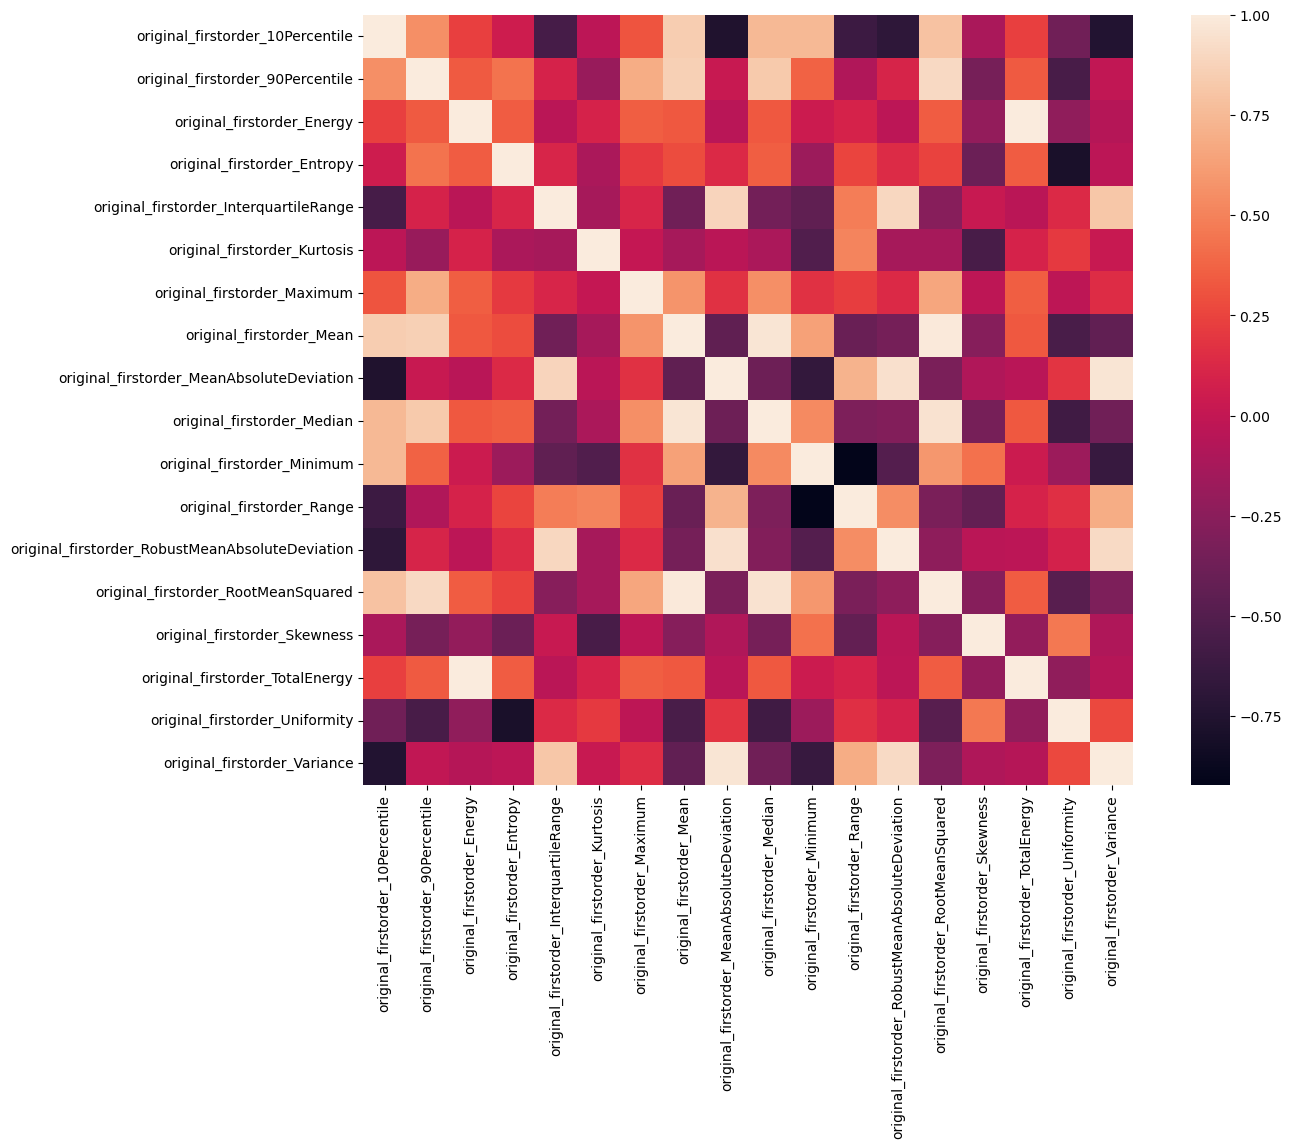

In [23]:
samples = np.zeros((len(im_n),len(feature_names)))
print(samples)
for i in range(1,len(im_n)):
    a = np.array([])
    for feature_name in feature_names:
        a = np.append(a, features[i][feature_name])
    samples[i,:] = a
print(samples)  
# Construct a pandas dataframe from the samples
d = pd.DataFrame(data=samples, columns=feature_names)

corr = d.corr()

# Set up the matplotlib figure, make it big!
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sns.heatmap(corr, vmax=1, square = True)

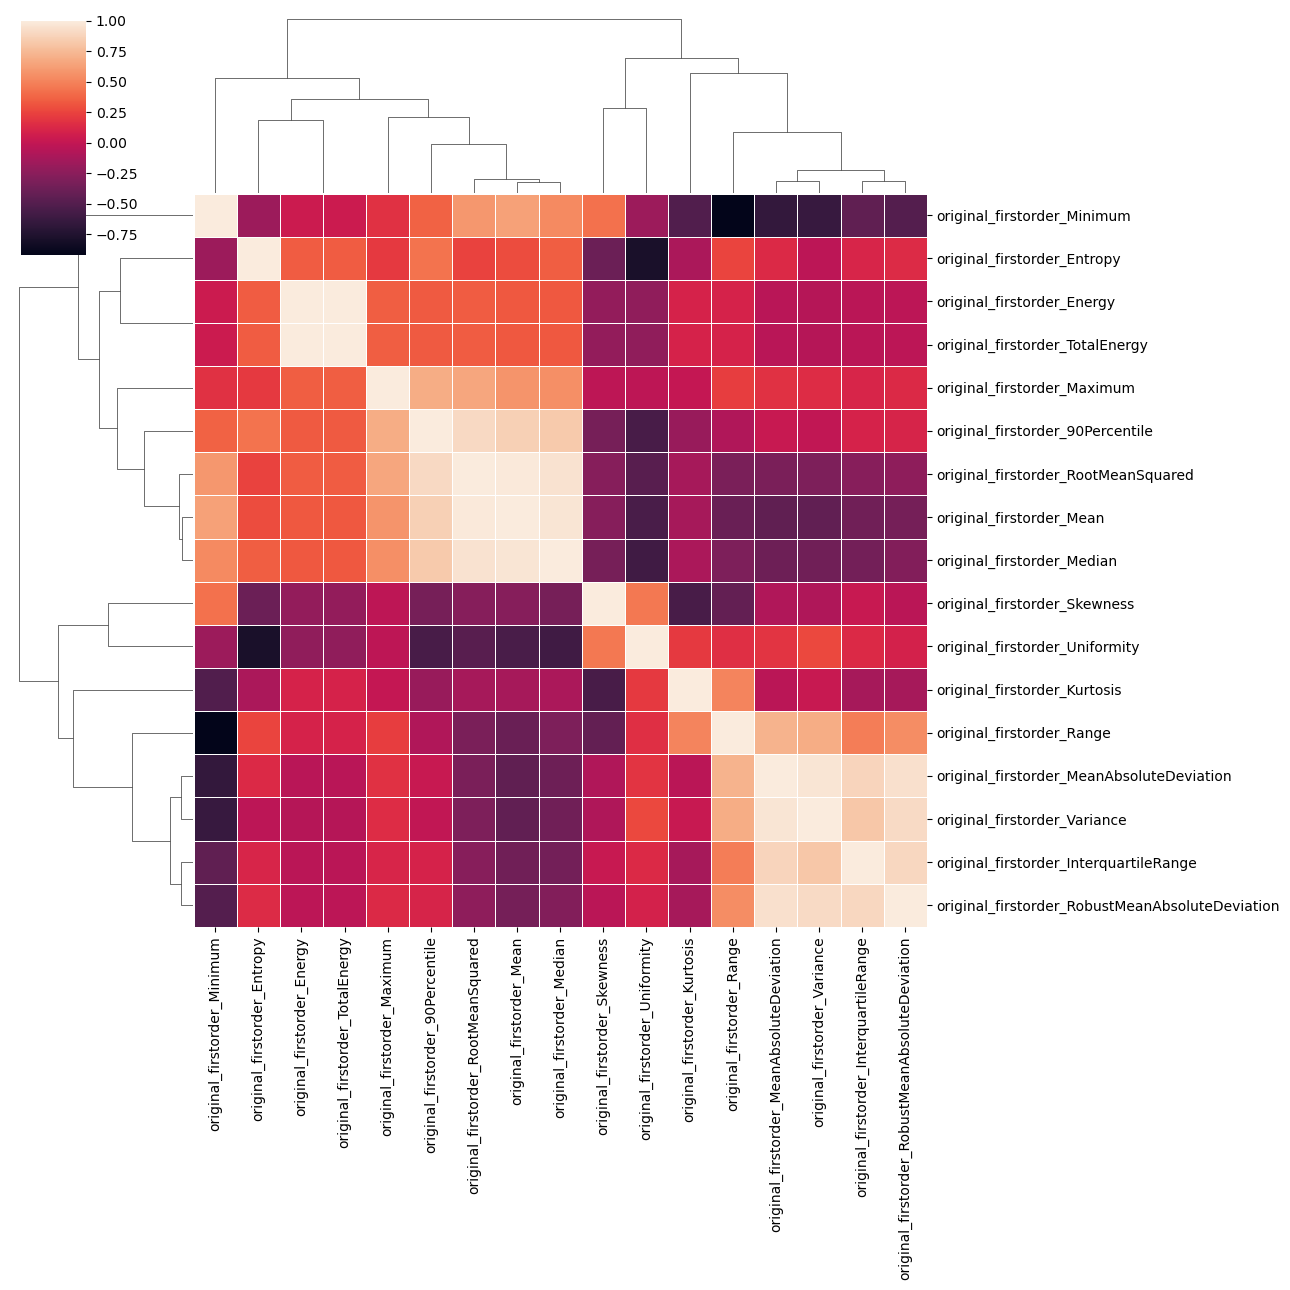

In [25]:
# Choose a subset of features for clustering
dd = d.iloc[:,1:50]

pp = sns.clustermap(dd.corr(), linewidths=.5, figsize=(13,13))
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)

plt.savefig('bcc_corr_1st_order.png', dpi= 400)
plt.show()
plt.close()